<a href="https://colab.research.google.com/github/sooonsyk/ESAA-22-2/blob/main/W14_HW_fri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3. 6\~7 pg. 105\~115
##06. 모델 저장 및 불러오기

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드=10개가 되어야 한다
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=10)

11490434/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)
Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2316 - accuracy: 0.9321 - val_loss: 0.1163 - val_accuracy: 0.9646
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0951 - accuracy: 0.9715 - val_loss: 0.0988 - val_accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.1005 - val_accuracy: 0.9670
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0507 - accuracy: 0.9836 - val_loss: 0.0769 - val_accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0384 - accuracy: 0.9872 - val_loss: 0.0975 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0782 - val_accuracy: 0

###6-1 모델을 파일로 저장
- 저장할 파일명이 .h5 확장자를 포함하는 경우는 HDF5 포맷으으로 저장 - 대용량 데이터 저장용
- .h5 확장자 생략하면 SavedModel 포맷으로 저장, HDF5와 같은 방식으로 복원

In [3]:
#모델을 h5 포맷으로 저장
model.save('h5-model.h5')

###6-2 저장된 모델 복원

In [5]:
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [6]:
#복원한 모델 검증해서 복원 잘 됐는지 확인
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss : {loss:.5f}, acc:{acc:.5f}')

h5 model] loss : 0.07890, acc:0.98090


In [7]:
#모델을 SavedModel 포맷으로 저장
model.save('saved-model')

In [10]:
#모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved-model] loss : {loss:.5f}, acc:{acc:.5f}')
#동일한 성능

saved-model] loss : 0.07890, acc:0.98090


##07. 복잡한 모델 생성

###7-1 함수형 API
- 함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조 구현할 수 있음, 여러 층을 시퀀스 형태로 연결하는 Sequential API 와 다르게 복잡한 모델 정의 가능
- 다중입력, 다중출력, 입출력 공유도 가능
- 함수형 API로 생성한 모델도 Sequential API로 생성한 모델과 동일한 방식으로 훈련하고 검증 가능

In [13]:
#Sequential API로 구현한 분류기 모델 함수형 API로 동일하게 구현

#Input 레이어 정의
input_layer = tf.keras.Input(shape=(28,28), name='InputLayer')

#모델의 레이어를 체인 구조로 연결 
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [15]:
#모델 생성 - tf.keras.Model()에 입력 레이어와 출력 레이어 정의
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

#모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


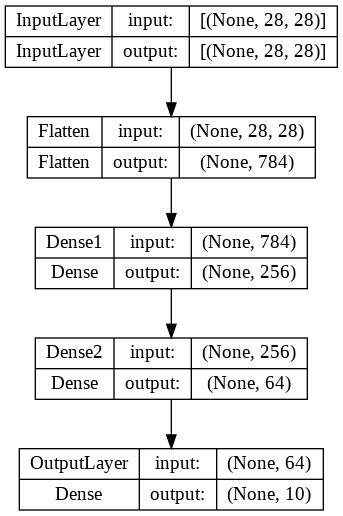

In [16]:
#복잡한 구조를 갖는 모델은 summary()보다 plot_model로 구조도 시각화
from tensorflow.keras.utils import plot_model

#구조도 시각화
plot_model(func_model,            #모델 지정
           show_shapes=True,      #입출력 shape 출력
           show_layer_names=True, #레이어 이름 출력
           to_file='model.png')   #이미지 파일로 저장

In [18]:
#컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
func_model.fit(x_train, y_train, epochs=3)

#검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss : {loss:.5f}, acc:{acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2197 - accuracy: 0.9344
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0890 - accuracy: 0.9727
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0616 - accuracy: 0.9803
Functional Model] loss : 0.08633, acc:0.97350


###7-2 모델 서브클래싱
- 텐서플로 케라스는 Model 클래스를 제공하고 이를 기반으로 딥러닝 모델을 구현함, 이 클래스를 직접 상속받아 사용자가 직접 서브 클래스로 딥러닝 모델 만들 수 있음


In [25]:
#tf.keras.Model 상속받아 생성하고자 하는 모델 클래스 구현
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

    #method overiding
    #훈련용 함수 정의 - fit() 메소드가 호출되어 훈련하는 경우 호출될 함수
    #x는 input
    #모델의 입력부터 출력까지의 흐름, forward propagation을 정의하고 함수형 API와같은 방식으로 모든 레이어를 체인 연결
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [26]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 생성
mymodel._name = 'subclass_model'

# 모델의 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()  

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_13 (Dense)            multiple                  200960    
                                                                 
 dense_14 (Dense)            multiple                  16448     
                                                                 
 dense_15 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [27]:
#컴파일
mymodel.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss:{loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2144 - accuracy: 0.9362
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0900 - accuracy: 0.9720
Epoch 3/3
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0622 - accuracy: 0.9799
Subclassing Model] loss:0.08199, acc: 0.97620


###7-3 서브클래싱 모델 파라미터를 활용한 생성
- Model Subclassing으로 생성하는 장점은 생성자 파라미터로 모델 내부 레이어의 하이퍼 파라미터를 지정할 수 있다는 점

In [28]:
#생성자 파라미터를 추가하여 동적으로 레이어의 유닛 개수 초기화
class MyModel(tf.keras.Model):

  #생성자 파라미터 추가
  def __init__(self, units, num_classes): #모델의 생성자 파라미터로 기준이 되는 unit 개수를 입력받아 Dense 레이어의 유닛 개수를 계산
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units, activation='relu')
    self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

  
  #class overiding
  #훈련용 함수 정의
  #X는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [29]:
#모델 생성
mymodel = MyModel(256,10)

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

#모델 요약
mymodel.summary()

Model: "my_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_16 (Dense)            multiple                  200960    
                                                                 
 dense_17 (Dense)            multiple                  16448     
                                                                 
 dense_18 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
